In [1]:
# Dubbed the MTP Model because it's from the paper with that author
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.optimize import curve_fit
from scipy.stats import norm

df = pd.read_csv(r"C:\Users\jjap2\Poleto SCE\Poleto-SCE\dond_game_data.csv")

In [2]:
df = df[(df["Postgame"] != 1) & (df["Offer"] != 0)]
df["Remaining Values"] = df["Remaining Values"].apply(eval) 
df["Total Remaining"] = df["Remaining Values"].apply(sum)

df['Bank Percentage'] = df['Offer']/df['Total Remaining']

In [3]:
p_values = (df["Bank Percentage"].shift(-1) - df["Bank Percentage"]) / (1 - df["Bank Percentage"])
p_estimate = p_values.mean()
print(f"Estimated p: {p_estimate:.6f}")

Estimated p: -0.017629


In [ ]:
X = df[["Total Remaining", "Bank Percentage"]]
y = df["Offer"].shift(-1)  # next round offer = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
y_pred = X_test["Total Remaining"] * (
    X_test["Bank Percentage"] + (1 - X_test["Bank Percentage"]) * p_estimate
)

In [6]:
results = pd.DataFrame({"Actual Offer": y_test, "Predicted Offer": y_pred})
print(results.head())

     Actual Offer  Predicted Offer
136       10000.0       490.304193
384      214000.0    126257.553908
45        59000.0    -25830.169696
734       53000.0     17731.649841
598        6000.0     10742.905920


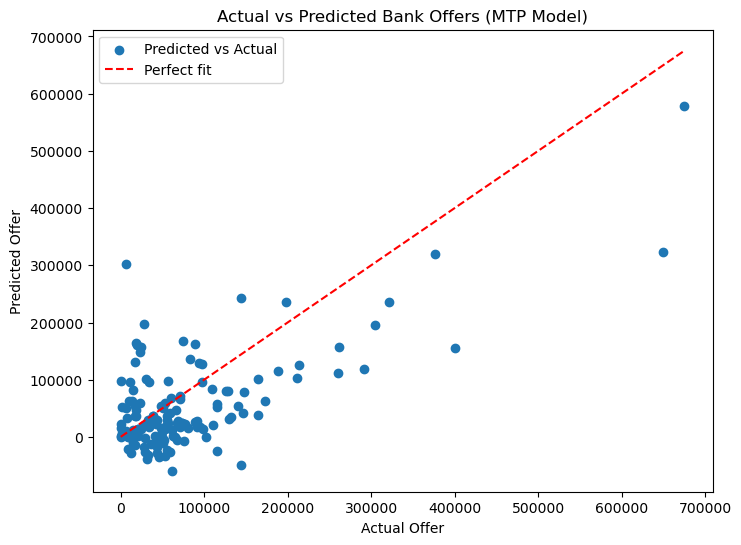

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect fit")
plt.xlabel("Actual Offer")
plt.ylabel("Predicted Offer")
plt.title("Actual vs Predicted Bank Offers (MTP Model)")
plt.legend()
plt.show()

In [ ]:
sigma = 1  # constant noise parameter (assumed)
df = df.iloc[:-1] 
df["Likelihood"] = norm.cdf((df["Offer"] - df["Total Remaining"]) / (sigma))
log_like = np.sum(np.log(df["Likelihood"]))
print(f"Log-Likelihood: {log_like:.6f}")

Log-Likelihood: -inf


c:\Users\jjap2\Anaconda\envs\phillies\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

R² Score: 0.3853
Mean Absolute Error (MAE): 58686.68
